<a href="https://colab.research.google.com/github/poojanayak25-web/My-Project-demo/blob/main/CNN%20multiclass%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2024-06-14 15:22:44--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  29.0MB/s    in 4.4s    

2024-06-14 15:22:51 (23.2 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [20]:
img_height,img_width=32,32
batch_size=20

train_ds= tf.keras.utils.image_dataset_from_directory(
    "/content/fruits/train",
    image_size=(img_height,img_width),
    batch_size=batch_size
)
val_ds=tf.keras.utils.image_dataset_from_directory(
    "/content/fruits/validation",
    image_size=(img_height,img_width),
    batch_size=batch_size
)
test_ds=tf.keras.utils.image_dataset_from_directory(
    "/content/fruits/test",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


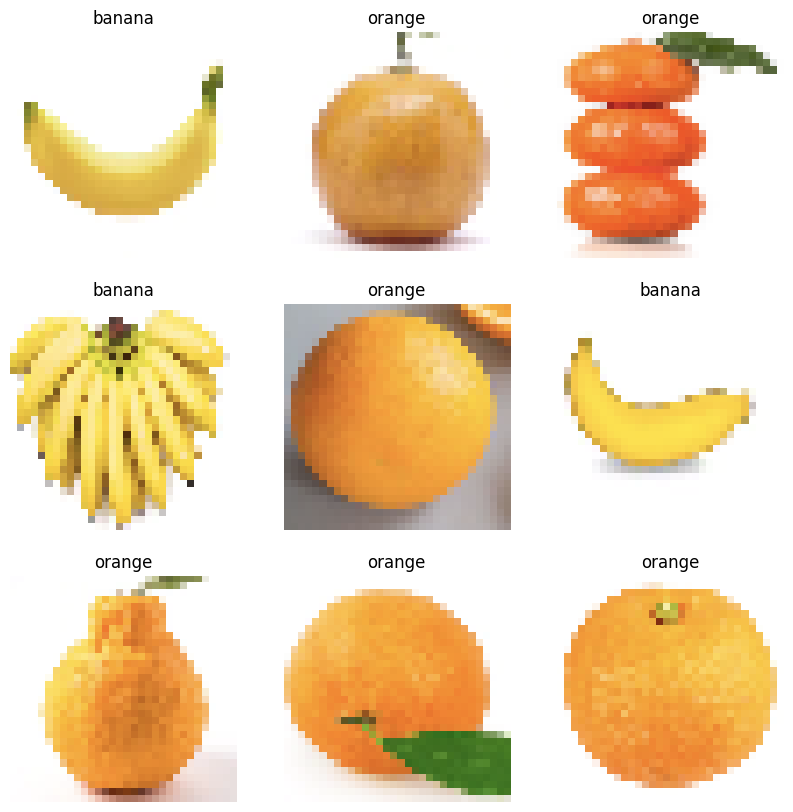

In [21]:
class_names=['apple','banana','orange']
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [22]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [23]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [24]:
model.fit(
    train_ds,validation_data=val_ds,epochs=10
)

Epoch 1/10
23/23 [==============================] - 3s 79ms/step - loss: 0.9742 - accuracy: 0.5630 - val_loss: 0.7366 - val_accuracy: 0.6667
Epoch 2/10
23/23 [==============================] - 2s 72ms/step - loss: 0.6328 - accuracy: 0.7000 - val_loss: 0.4534 - val_accuracy: 0.8333
Epoch 3/10
23/23 [==============================] - 5s 203ms/step - loss: 0.4297 - accuracy: 0.8217 - val_loss: 0.3934 - val_accuracy: 0.8788
Epoch 4/10
23/23 [==============================] - 4s 74ms/step - loss: 0.3339 - accuracy: 0.8565 - val_loss: 0.4325 - val_accuracy: 0.8030
Epoch 5/10
23/23 [==============================] - 2s 74ms/step - loss: 0.2999 - accuracy: 0.8870 - val_loss: 0.2297 - val_accuracy: 0.9242
Epoch 6/10
23/23 [==============================] - 2s 73ms/step - loss: 0.2418 - accuracy: 0.9043 - val_loss: 0.4935 - val_accuracy: 0.8030
Epoch 7/10
23/23 [==============================] - 2s 74ms/step - loss: 0.1997 - accuracy: 0.9304 - val_loss: 0.5951 - val_accuracy: 0.8030
Epoch 8/10
2

In [25]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 11ms/step - loss: 0.2795 - accuracy: 0.9000


[0.2795414328575134, 0.8999999761581421]

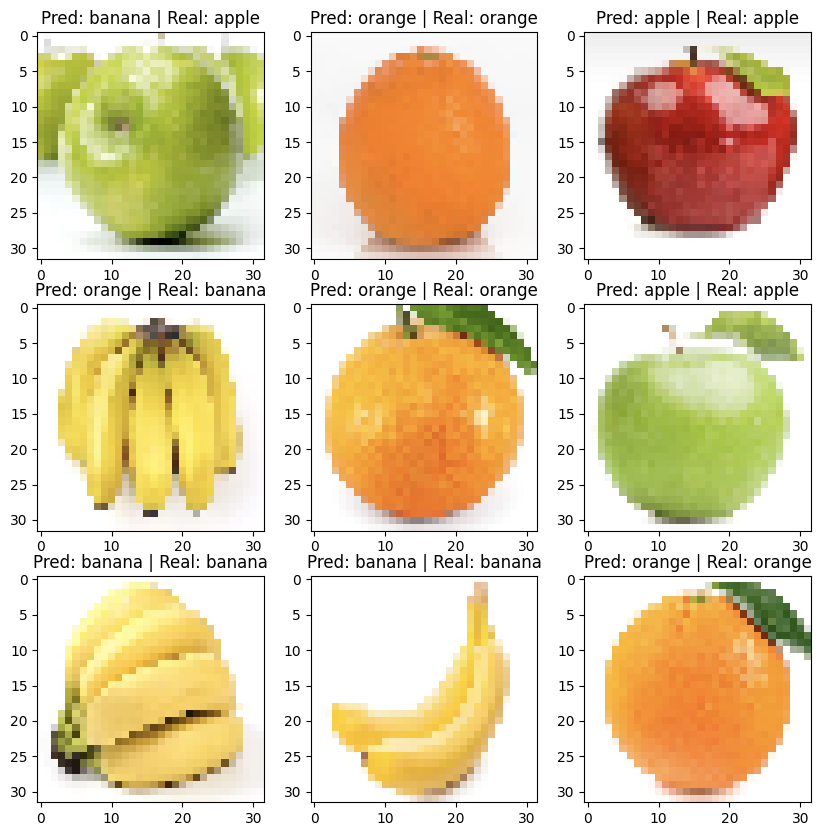

In [26]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with open("model.tflite",'wb') as f:
  f.write(tflite_model)